In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
#plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle
from scipy import signal

In [2]:
#Upload Data 
azure_data = pd.read_csv("data/azure22Ne_an_data.txt", skiprows=2, names=['E', 'xn'], \
                         delim_whitespace=True)
print (azure_data.head(10))

         E            xn
0  0.48223  1.665300e-18
1  0.48232  1.723500e-18
2  0.48240  1.782800e-18
3  0.48248  1.843100e-18
4  0.48257  1.904400e-18
5  0.48265  1.966800e-18
6  0.48274  2.030200e-18
7  0.48282  2.094700e-18
8  0.48291  2.160300e-18
9  0.48299  2.226900e-18


In [3]:
#Upload Data 
dedx_data = pd.read_csv("data/Ne-dEdx.txt", skiprows=8, names=['E', 'dEdx'], \
                         delim_whitespace=True)
print (dedx_data.head(10))

        E   dEdx
0  0.0010  169.5
1  0.0015  180.2
2  0.0020  188.2
3  0.0025  195.0
4  0.0030  201.0
5  0.0040  211.8
6  0.0050  221.6
7  0.0060  230.8
8  0.0070  239.6
9  0.0080  248.0


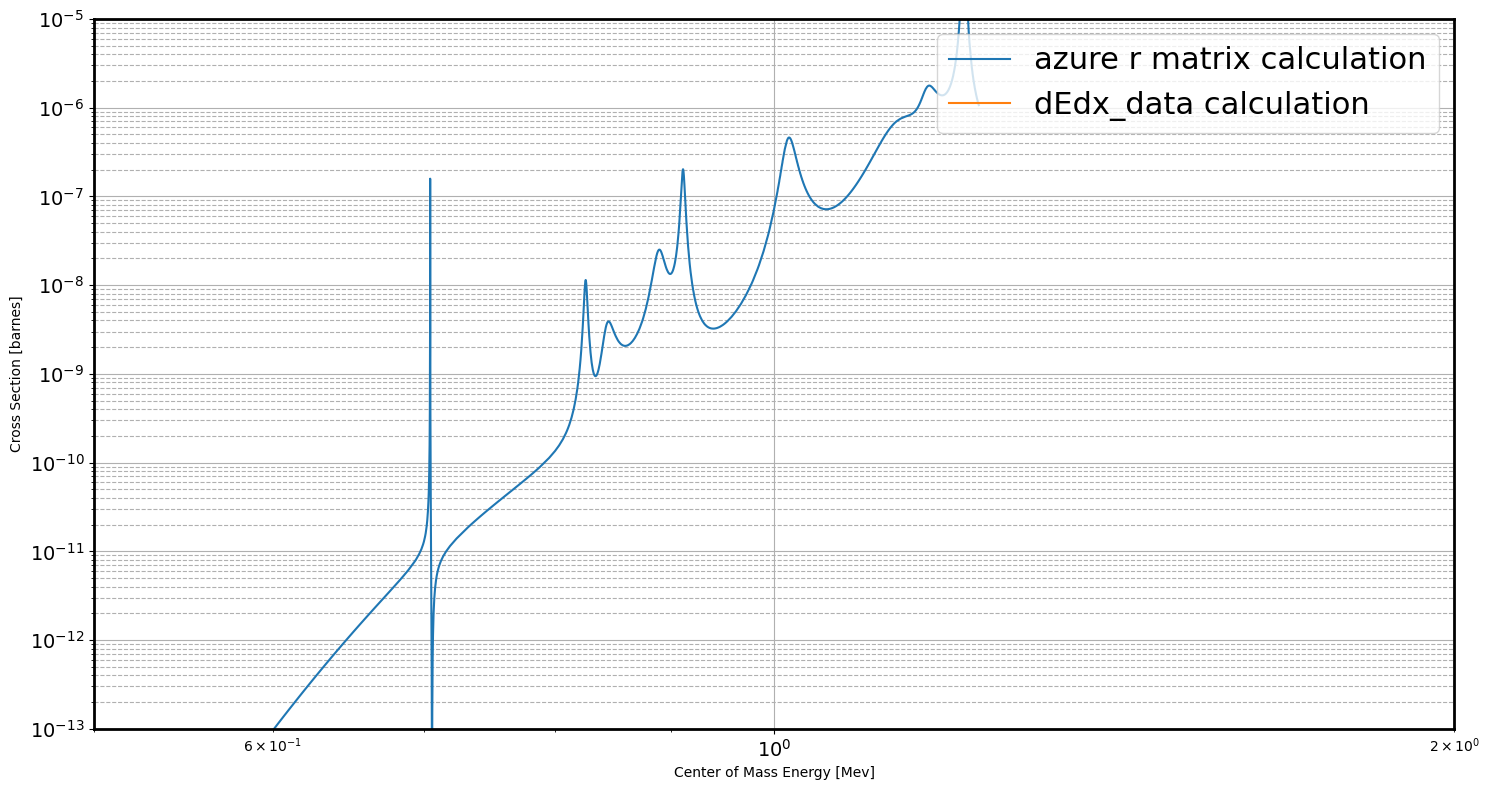

In [11]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes

#Set data as variables
E = np.asarray(azure_data['E']) 
xn = np.asarray(azure_data['xn'])
#print(estring) 

ax1.plot(E,xn,label='azure r matrix calculation')
#ax1.plot(etot, etotspec,color='orange',label="smoothed spectrum")

E = np.asarray(dedx_data['E']) 
dEdx = np.asarray(dedx_data['dEdx']) 
#print(estring)
ax1.plot(E,dEdx,label='dEdx_data calculation')
#ax1.plot(etot, etotspec,color='orange',label="smoothed spectrum")

ymin = 1e-13
ymax = 1e-5

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(.5, 2) 
ax1.set_ylim(ymin,ymax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax1.set_xlabel(r'Center of Mass Energy [Mev]') 
ax1.set_ylabel('Cross Section [barnes]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()


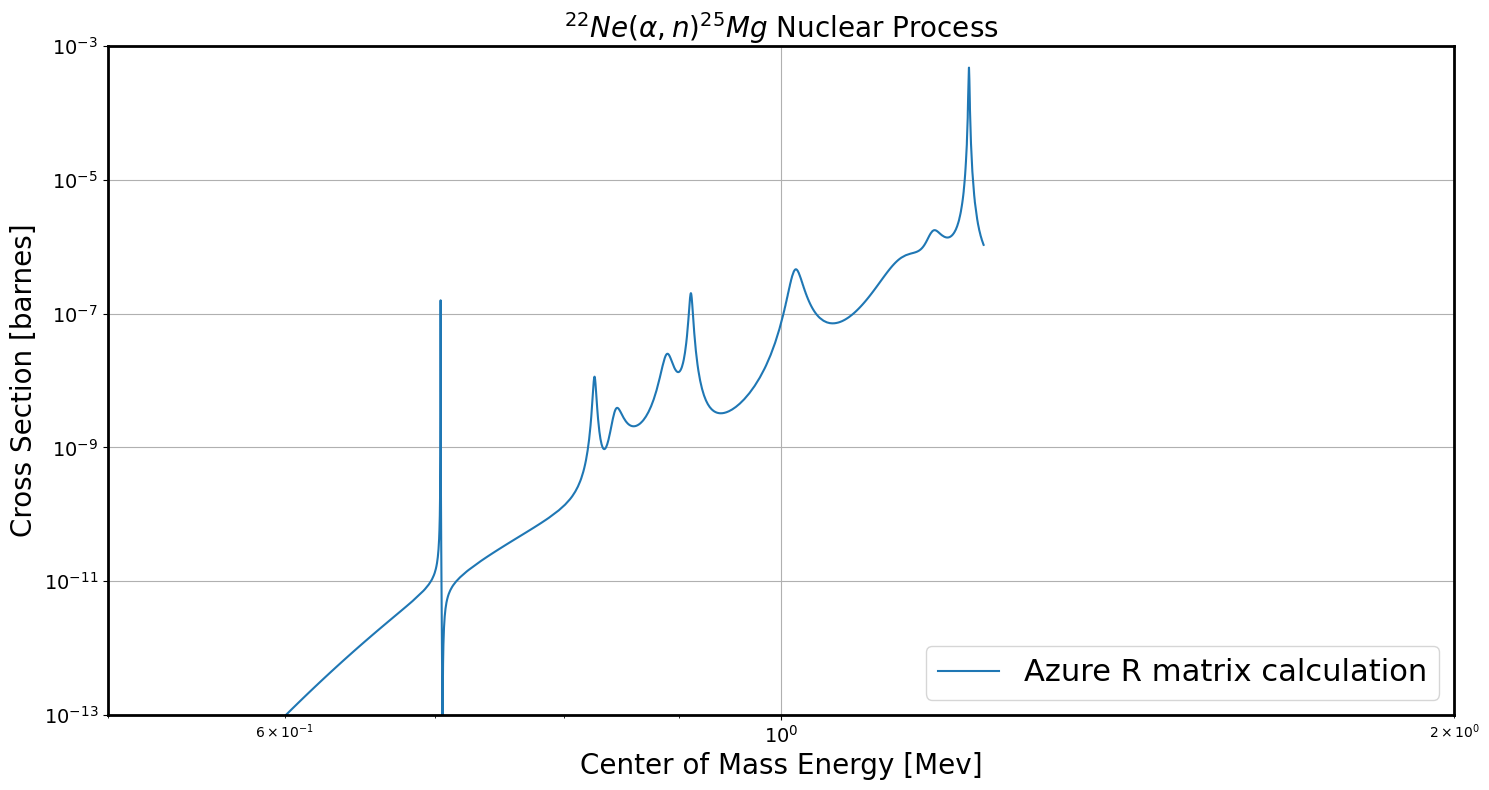

In [19]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes

#Set data as variables
E = np.asarray(azure_data['E']) 
xn = np.asarray(azure_data['xn'])
#print(estring) 

ax1.plot(E,xn,label='Azure R matrix calculation')
#ax1.plot(etot, etotspec,color='orange',label="smoothed spectrum")

ymin = 1e-13
ymax = 1e-3

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(.5, 2) 
ax1.set_ylim(ymin,ymax) 
ax1.set_title('$^{22}Ne(\u03B1,n)^{25}Mg$ Nuclear Process', fontsize=20) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax1.set_xlabel(r'Center of Mass Energy [Mev]', fontsize=20)
ax1.set_ylabel('Cross Section [barnes]', fontsize=20)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=4,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('BPlot1.png')
plt.show()


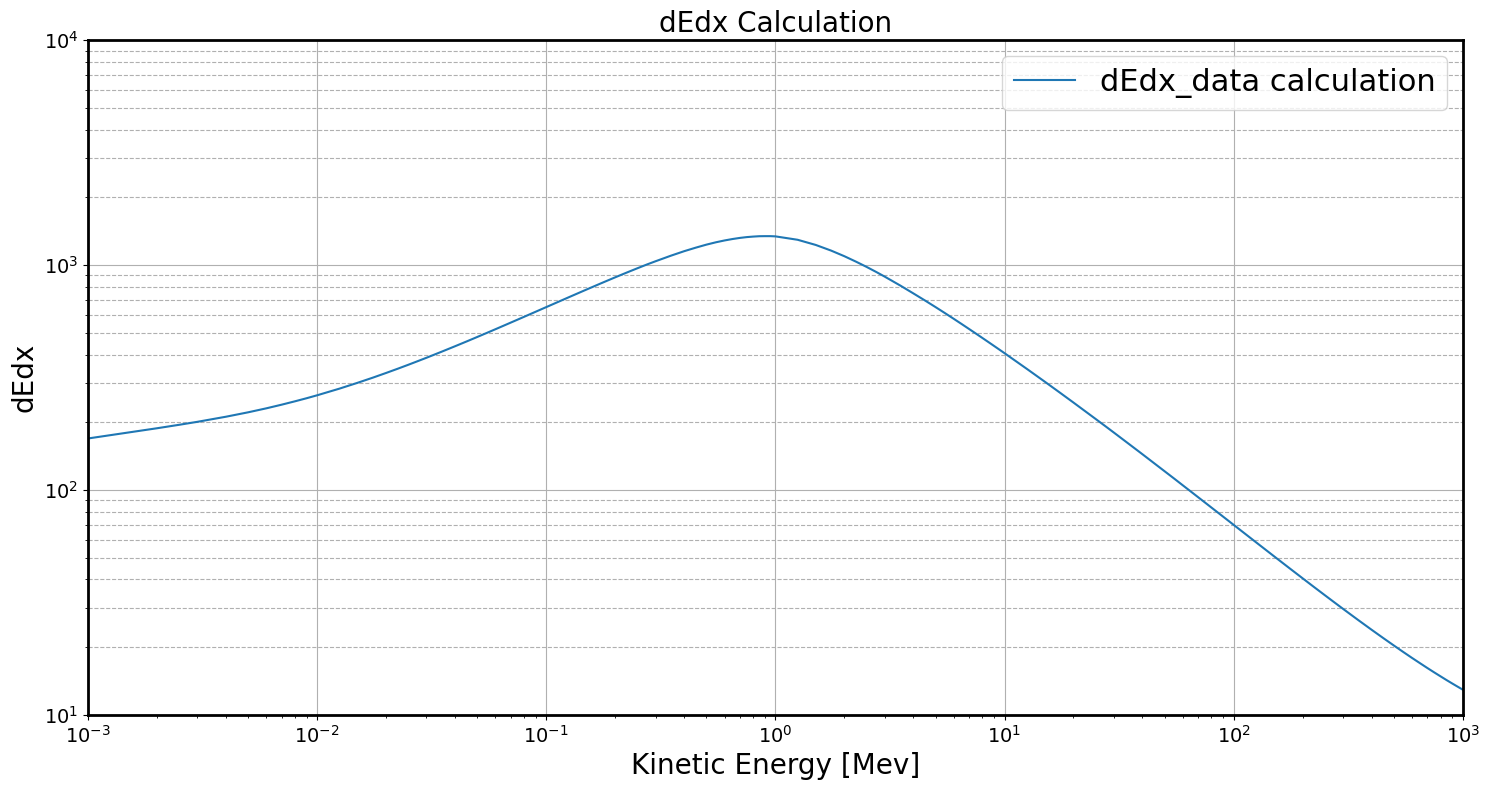

In [21]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes

E = np.asarray(dedx_data['E']) 
dEdx = np.asarray(dedx_data['dEdx']) 
#print(estring)
ax1.plot(E,dEdx,label='dEdx_data calculation')
#ax1.plot(etot, etotspec,color='orange',label="smoothed spectrum")

ymin = 1e1
ymax = 1e4 

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(1e-3, 1e3) 
ax1.set_ylim(ymin,ymax) 
ax1.set_title('dEdx Calculation', fontsize=20) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax1.set_xlabel('Kinetic Energy [Mev]', fontsize=20)
ax1.set_ylabel('dEdx', fontsize=20)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('BPlot2.png')
plt.show()
